
## Task 4 - Movie Recommenders

## Instructions

## Task: Build a Movie Recommender system with the following methods:

Popularity

Content Filter

Collaborative Filter

Matrix Factorization

Hybrid

Also, try the following libraries on the dataset:

Turicreate
Surprise
Dataset: MovieLens 20M 

Source: https://grouplens.org/datasets/movielens/20m/

### Import the libraries

In [1]:
pip install scikit-surprise


     ---------------------------------------- 0.0/772.0 kB ? eta -:--:--
     --------------------- --------------- 450.6/772.0 kB 14.2 MB/s eta 0:00:01
     ------------------------------------- 772.0/772.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp311-cp311-win_amd64.whl size=1079264 sha256=b0199dd68b2e5e5a37c0bbd49f9fce93f88d9237fd71a854bcf5207d289a5d90
  Stored in directory: c:\users\krishna\appdata\local\pip\cache\wheels\f4\2b\26\e2a5eae55d3b7688995e66abe7f40473aac6c95ddd8ee174a8
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.algo_base import AlgoBase

In [39]:
column_names = ['MovieID', 'Title', 'Genres']
movies_subset = pd.read_csv('movies.csv')[:100000]

In [40]:
column_names = ['User_ID', 'MovieID', 'Rating', 'Timestamp']
ratings_subset = pd.read_csv('ratings.csv')[:100000]

In [41]:
column_names = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip-code']
tags_subset = pd.read_csv('tags.csv')[:100000]

### Display the movies data

In [42]:
print("\nMovies Data :")
print("shape : ", movies_subset.shape)
print(movies_subset.head())


Movies Data :
shape :  (27278, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [43]:
movies_subset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


### Display the Ratings data

In [44]:
print("\nRatings Data :")
print("shape : ", ratings_subset.shape)
print(ratings_subset.head())


Ratings Data :
shape :  (100000, 4)
   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580


In [45]:
ratings_subset

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
99995,702,1373,3.0,1095142579
99996,702,1374,2.5,1095136686
99997,702,1377,1.5,1095141779
99998,702,1378,1.5,1095139088


### Display the Items data

In [46]:
print("\nTags Data :")
print("shape : ", tags_subset.shape)
print(tags_subset.head())


Tags Data :
shape :  (100000, 4)
   userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078


In [47]:
tags_subset

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
99995,25737,1805,Nudity (Topless),1296955688
99996,25737,1805,plot twist,1296955691
99997,25737,1805,pulp,1296955693
99998,25737,1805,sexy,1296955718


In [48]:
from sklearn.model_selection import train_test_split
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

train_data, test_data = train_test_split(ratings_subset, test_size=0.2, random_state=42)

# Display the shapes of the resulting DataFrames
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (80000, 4)
Testing data shape: (20000, 4)


### Display the Training and Testing Ratings data

In [49]:
train_data.shape, test_data.shape

((80000, 4), (20000, 4))

### How many unique users?

In [50]:
print(ratings_subset.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [53]:
n_users = ratings_subset['movieId'].nunique()
print("Number of unique movies:", n_users)

Number of unique movies: 8227


In [52]:
n_users

8227

### How many unique items / movies?

In [54]:
n_tags = ratings_subset.movieId.unique().shape[0]
n_tags

8227

### Create a User-Item Matrix

In [55]:
from scipy.sparse import csr_matrix

In [59]:

user_movies_data = ratings_subset.pivot_table(index='movieId', columns='userId', values='rating', fill_value=0)


In [60]:
user_movies_data

userId,1,2,3,4,5,6,7,8,9,10,...,693,694,695,696,697,698,699,700,701,702
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,4,0,0,5,0,4,0,4,...,0.0,4.5,0.0,0,0.0,0,4,4.0,0.0,3.5
2,3.5,0,0,0,3,0,0,0,0,0,...,0.0,1.5,0.0,0,0.0,5,0,0.0,0.0,0.0
3,0.0,4,0,0,0,3,3,5,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0
4,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0
5,0.0,0,0,0,0,0,0,0,0,0,...,0.0,2.5,0.0,0,3.5,0,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118997,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0
119141,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0
125916,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0


# 1. Content Filtering


### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [61]:
movies_subset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [62]:
movies_subset['metadata'] = " "

In [63]:
movies_subset

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,
1,2,Jumanji (1995),Adventure|Children|Fantasy,
2,3,Grumpier Old Men (1995),Comedy|Romance,
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,
4,5,Father of the Bride Part II (1995),Comedy,
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,
27275,131258,The Pirates (2014),Adventure,
27276,131260,Rentun Ruusu (2001),(no genres listed),


In [64]:
Action = movies_subset[movies_subset['genres'] == 'Action']
Action

,movieId,title,genres,metadata
8,9,Sudden Death (1995),Action,
70,71,Fair Game (1995),Action,
202,204,Under Siege 2: Dark Territory (1995),Action,
248,251,"Hunted, The (1995)",Action,
659,667,Bloodsport 2 (a.k.a. Bloodsport II: The Next K...,Action,
...,...,...,...,...
26876,129239,The Monkey Hustle (1976),Action,
26899,129346,The Package (2012),Action,
26965,129657,Tracers (2015),Action,
27139,130526,The Detective 2 (2011),Action,


In [65]:
print(movies_subset.columns)

Index(['movieId', 'title', 'genres', 'metadata'], dtype='object')


In [66]:
Action = movies_subset[movies_subset['genres'] == 'Action']
print(Action)



       movieId                                              title  genres  \
8            9                                Sudden Death (1995)  Action   
70          71                                   Fair Game (1995)  Action   
202        204               Under Siege 2: Dark Territory (1995)  Action   
248        251                                 Hunted, The (1995)  Action   
659        667  Bloodsport 2 (a.k.a. Bloodsport II: The Next K...  Action   
...        ...                                                ...     ...   
26876   129239                           The Monkey Hustle (1976)  Action   
26899   129346                                 The Package (2012)  Action   
26965   129657                                     Tracers (2015)  Action   
27139   130526                             The Detective 2 (2011)  Action   
27198   131025                            The Brass Legend (1956)  Action   

      metadata  
8               
70              
202             
248    

In [67]:
movies_subset['Action'] = (movies_subset['genres'] == 'Action').astype(int)
print(movies_subset['Action'])


0        0
1        0
2        0
3        0
4        0
        ..
27273    0
27274    0
27275    0
27276    0
27277    0
Name: Action, Length: 27278, dtype: int32


In [68]:
def metadata_Action(x):
    if x == 1:
        return "Action"
    else:
        return " "
movies_subset['metadata_Action'] = movies_subset.Action.apply(metadata_Action)   

In [69]:
movies_subset

,movieId,title,genres,metadata,Action,metadata_Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,,0,
1,2,Jumanji (1995),Adventure|Children|Fantasy,,0,
2,3,Grumpier Old Men (1995),Comedy|Romance,,0,
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,,0,
4,5,Father of the Bride Part II (1995),Comedy,,0,
...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,,0,
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,,0,
27275,131258,The Pirates (2014),Adventure,,0,
27276,131260,Rentun Ruusu (2001),(no genres listed),,0,


In [70]:
movies_subset['Drama'] = (movies_subset['genres'] == 'Drama').astype(int)
print(movies_subset['Drama'])


0        0
1        0
2        0
3        0
4        0
        ..
27273    0
27274    0
27275    0
27276    0
27277    0
Name: Drama, Length: 27278, dtype: int32


In [71]:
def metadata_Drama(x):
    if x == 1:
        return "Drama"
    else:
        return " "
movies_subset['metadata_Drama'] = movies_subset.Action.apply(metadata_Drama)  

In [72]:
genres = ['Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [75]:
def get_genres(series):
    return series['Genres'].replace("|", " ")

In [85]:
movies = pd.read_csv('movies.csv')
def get_metadata(genres):
    return '|'.join(genres.split('|'))

# Applying the function to create the 'metadata' column
movies['metadata'] = movies['genres'].apply(get_metadata)

# Displaying the updated DataFrame with the 'metadata' column
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                      metadata  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


## TF-IDF Vectorizer

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_subset['title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=movies_subset.index.tolist())
print(tfidf_df.shape)

(27278, 21709)


In [87]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,21699,21700,21701,21702,21703,21704,21705,21706,21707,21708
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


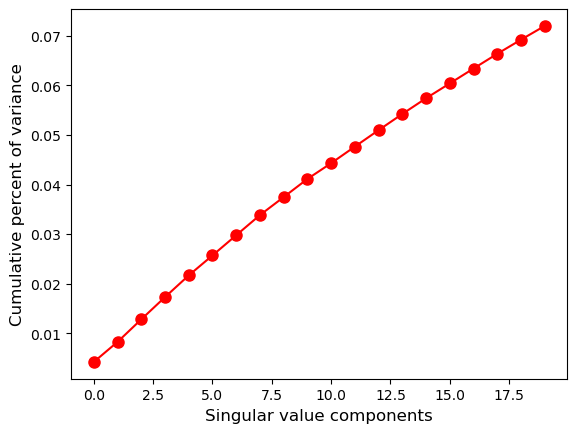

In [89]:

import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Assuming tfidf_df is your TF-IDF matrix

# Initialize TruncatedSVD
svd = TruncatedSVD(n_components=20)
latent_matrix_1 = svd.fit_transform(tfidf_df)

# Assuming movies_subset is a DataFrame containing movie titles
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix_1[:len(movies_subset), 0:n], index=movies_subset['title'].tolist())

# Plot explained variance ratio
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16, color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()


In [90]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix_1[:len(movies_subset), 0:n], index=movies_subset['title'].tolist())

In [91]:
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Toy Story (1995),0.018832,0.019511,0.005320,0.004293,0.011453,0.012768,0.009597,0.005343,0.016261,0.009163,0.027380,0.016967,0.005077,0.018436,0.015088,0.047728,0.018431,0.034581,0.120959,0.168341
Jumanji (1995),0.005637,0.006305,0.001235,0.002588,0.003712,0.007053,0.004670,0.003568,0.009879,0.007332,0.018988,0.010369,0.003996,0.015854,0.003679,0.034977,0.015438,0.036713,0.112458,0.167256
Grumpier Old Men (1995),0.012315,0.011922,0.004437,0.005971,0.007579,0.010118,0.005992,0.006889,0.014877,0.005452,0.023494,0.010658,0.007669,0.016220,0.011068,0.039649,0.004690,0.016327,0.087828,0.131830
Waiting to Exhale (1995),0.005666,0.007846,0.000871,0.004757,0.004590,0.006347,0.003024,0.002610,0.008629,0.008301,0.016252,0.008278,0.002955,0.014205,0.002310,0.028830,0.012727,0.032693,0.090876,0.134457
Father of the Bride Part II (1995),0.012509,0.014876,0.006068,0.007223,0.005805,0.015140,0.007709,0.001597,0.018479,0.008441,0.030469,0.010431,0.004864,0.012978,0.011088,0.042692,0.018051,0.027602,0.103105,0.152052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kein Bund für's Leben (2007),0.014232,0.022168,0.007847,0.011876,0.016032,0.201587,-0.086127,-0.027077,-0.022255,-0.008727,-0.012052,-0.003582,-0.003145,-0.004091,-0.005204,-0.006864,-0.001690,-0.001370,-0.004882,-0.004529
"Feuer, Eis & Dosenbier (2002)",0.005037,0.006439,0.002242,0.003273,0.002676,0.006573,0.004651,0.003265,0.013466,0.011682,0.182387,-0.155257,-0.047401,-0.038793,-0.017227,-0.018451,-0.003219,-0.001735,-0.005428,-0.000399
The Pirates (2014),0.024934,0.036737,0.013420,0.016094,0.022405,0.090970,0.116029,0.451235,-0.061057,-0.022943,-0.031209,-0.009142,-0.005821,-0.010744,-0.012123,-0.017490,-0.002483,-0.004980,-0.007868,-0.010022
Rentun Ruusu (2001),0.005869,0.007222,0.002550,0.002640,0.003629,0.007489,0.005616,0.002831,0.015448,0.016468,0.095990,0.080986,0.248359,-0.112789,-0.029603,-0.027692,-0.007505,-0.008727,-0.013087,-0.007048


In [92]:
latent_matrix_1_df.shape

(27278, 20)

## 2. Collaborative Filtering


In [93]:
from sklearn.decomposition import TruncatedSVD
from surprise.model_selection import train_test_split
import pandas as pd

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = SVD(n_factors=20, random_state=42)
svd_model.fit(trainset)

latent_matrix_2 = svd_model.pu

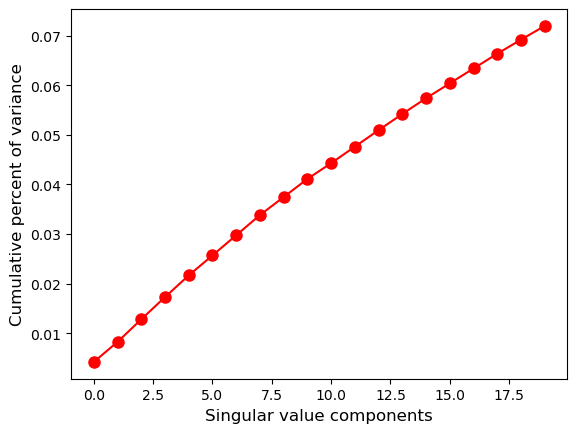

In [94]:
latent_matrix_2 = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()

In [97]:
n = 19
latent_matrix_2_df = pd.DataFrame(latent_matrix_2[:, :n], index=ratings_subset['movieId'][:27278].tolist())

In [98]:
latent_matrix_2_df.shape

(27278, 19)

In [99]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2,0.018549,0.020516,0.006069,0.004314,0.010134,0.012226,0.009248,0.005019,0.018452,0.010071,0.027414,0.015393,0.009033,0.014468,0.017161,0.033223,-0.030828,0.013381,0.063002
29,0.005436,0.007409,0.002278,0.002570,0.002431,0.006263,0.004700,0.002774,0.011663,0.007915,0.019620,0.007899,0.008125,0.013233,0.005282,0.023681,-0.026476,0.013768,0.048115
32,0.012188,0.012710,0.005065,0.005889,0.006776,0.009648,0.006214,0.006276,0.015834,0.006270,0.024063,0.008403,0.010523,0.014860,0.011897,0.030087,-0.012163,0.003188,0.039136
47,0.005501,0.008741,0.001700,0.004736,0.003569,0.005700,0.003055,0.001968,0.010026,0.008798,0.016796,0.006345,0.006142,0.012060,0.003641,0.019680,-0.022128,0.013809,0.038259
50,0.012319,0.015743,0.006960,0.007064,0.005118,0.014636,0.008019,0.000775,0.018979,0.009640,0.031467,0.010894,0.008835,0.012236,0.009122,0.032456,-0.031171,0.010064,0.048136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.014224,0.022123,0.007772,0.011850,0.016452,0.201235,-0.086786,-0.027110,-0.021790,-0.009283,-0.012231,-0.004258,-0.003132,-0.004527,-0.004515,-0.006817,0.002677,-0.001467,-0.004872
589,0.005044,0.006401,0.002381,0.003320,0.002558,0.006250,0.004452,0.003194,0.014047,0.010877,0.183628,-0.153210,-0.050064,-0.038598,-0.018081,-0.018011,0.003252,-0.002324,-0.005631
593,0.024938,0.036565,0.013126,0.015879,0.022810,0.092005,0.117950,0.450353,-0.061008,-0.024080,-0.031473,-0.010692,-0.006497,-0.011243,-0.010587,-0.017048,0.004559,-0.005201,-0.007474
594,0.005939,0.007157,0.002393,0.002867,0.003316,0.007383,0.005195,0.003746,0.016792,0.015867,0.089387,0.062181,0.261891,-0.093976,-0.042069,-0.028784,0.005850,-0.004970,-0.013651


## 3. Hybrid Recommendation System

In [100]:
class Hybrid(AlgoBase):
    def __init__(self, svd_model, knn_model, sim_options={}, bsl_options={}, verbose=True):
        AlgoBase.__init__(self, sim_options=sim_options, bsl_options=bsl_options, verbose=verbose)
        self.svd_model = svd_model
        self.knn_model = knn_model

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        self.svd_model.fit(trainset)
        self.knn_model.fit(trainset)
        return self

    def estimate(self, u, i):
        svd_prediction = self.svd_model.predict(u, i).est
        knn_prediction = self.knn_model.predict(u, i).est
        return (svd_prediction + knn_prediction) / 2

knn_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
svd_model = SVD(n_factors=50, random_state=42)

hybrid_model = Hybrid(svd_model, knn_model)
hybrid_model.fit(trainset)


test_predictions = hybrid_model.test(testset)
accuracy.rmse(test_predictions, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1374


1.1374471854400259

In [101]:
def recommend_similar_movies(movie_title, movies, latent_matrix, tfidf_vectorizer):
    # Get the index of the provided movie title
    movie_indices = movies.index[movies['title'] == movie_title].tolist()

    if not movie_indices:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []

    idx = movie_indices[0]
    
    cosine_similarities = cosine_similarity(latent_matrix, latent_matrix[idx].reshape(1, -1)).flatten()

    similar_movies_indices = cosine_similarities.argsort()[::-1]

    similar_movies_indices = [i for i in similar_movies_indices if i != idx]

    if len(similar_movies_indices) < 5:
        print("Not enough movies in the dataset for recommendations.")
        return []

    similar_movies_indices = similar_movies_indices[:5]
    similar_movies = movies.iloc[similar_movies_indices]['title'].tolist()
    return similar_movies

In [102]:
similar_movies = recommend_similar_movies("Toy Story (1995)", movies_subset, latent_matrix_1, tfidf)
print("Recommended movies for Toy Story (1995):")
for movie in similar_movies:
    print(movie)


Recommended movies for Toy Story (1995):
Lilian's Story (1995)
Hundred and One Nights, A (Cent et une nuits de Simon Cinéma, Les) (1995)
Hate (Haine, La) (1995)
Boy Called Hate, A (1995)
Big Green, The (1995)


In [103]:
similar_movies = recommend_similar_movies(("GoldenEye (1995)"), movies_subset, latent_matrix_1, tfidf)
print("Recommended movies for GoldenEye (1995)")
for movie in similar_movies:
    print(movie)

Recommended movies for GoldenEye (1995)
Gospa (1995)
Fantasticks, The (1995)
Fluke (1995)
Uncovered (1995)
Bushwhacked (1995)


In [104]:
similar_movies = recommend_similar_movies(("Mission: Impossible (1996)"), movies_subset, latent_matrix_1, tfidf)
print("Recommended movies for Mission: Impossible (1996)")
for movie in similar_movies:
    print(movie)

Recommended movies for Mission: Impossible (1996)
Ebola Syndrome, The (Yi boh laai beng duk) (1996)
Chain Reaction (1996)
Scream (1996)
Santa with Muscles (1996)
Crocodile (Ag-o) (1996)


## 4. Popularity Recommendation

In [105]:
average_ratings = ratings_subset.groupby('movieId')['rating'].mean()

popularity_recommendations = average_ratings.sort_values(ascending=False).index

movies_titles = movies_subset[['movieId', 'title']]
popularity_recommendations = pd.merge(pd.DataFrame(popularity_recommendations, columns=['movieId']), movies_titles, on='movieId')['title']


In [106]:
print("Popularity Recommendations (based on average ratings):")
print(popularity_recommendations)

Popularity Recommendations (based on average ratings):
0                    Hour of the Wolf (Vargtimmen) (1968)
1       His Secret Life (a.k.a. Ignorant Fairies, The)...
2                                        Hopscotch (1980)
3                        Comfort of Strangers, The (1990)
4                                  Shogun Assassin (1980)
                              ...                        
8222               Better Living Through Chemistry (2014)
8223    Starship Troopers 2: Hero of the Federation (2...
8224                                        Oldboy (2013)
8225                                  It Takes Two (1995)
8226                                Boy Meets Girl (2015)
Name: title, Length: 8227, dtype: object


In [107]:
print(popularity_recommendations.head(25))

0                  Hour of the Wolf (Vargtimmen) (1968)
1     His Secret Life (a.k.a. Ignorant Fairies, The)...
2                                      Hopscotch (1980)
3                      Comfort of Strangers, The (1990)
4                                Shogun Assassin (1980)
5                                   Live Forever (2003)
6                                   Gambler, The (1974)
7                                     Ratcatcher (1999)
8                     Scarlet and the Black, The (1983)
9                                          Yentl (1983)
10                    Incredible Mr. Limpet, The (1964)
11                                 Chaos (Kaosu) (1999)
12                              Teddy Bear (Mis) (1981)
13                                        Exodus (1960)
14    Russians Are Coming, the Russians Are Coming, ...
15                    World of Henry Orient, The (1964)
16                              Murder, My Sweet (1944)
17            Spy Who Came in from the Cold, The

In [108]:
user_ids = [1, 2, 3, 4, 5]
user_recommendations = pd.DataFrame({'userId': [], 'movieId': []})

for user_id in user_ids:
    user_recommendations = pd.concat([user_recommendations, pd.DataFrame({'userId': [user_id] * len(popularity_recommendations), 'movieId': popularity_recommendations.tolist()})])


In [109]:
print("User-specific Recommendations (Popularity-based):")
print(user_recommendations)


User-specific Recommendations (Popularity-based):
      userId                                            movieId
0        1.0               Hour of the Wolf (Vargtimmen) (1968)
1        1.0  His Secret Life (a.k.a. Ignorant Fairies, The)...
2        1.0                                   Hopscotch (1980)
3        1.0                   Comfort of Strangers, The (1990)
4        1.0                             Shogun Assassin (1980)
...      ...                                                ...
8222     5.0             Better Living Through Chemistry (2014)
8223     5.0  Starship Troopers 2: Hero of the Federation (2...
8224     5.0                                      Oldboy (2013)
8225     5.0                                It Takes Two (1995)
8226     5.0                              Boy Meets Girl (2015)

[41135 rows x 2 columns]


## Turicreate - Python Library for easy recommendation engine building

In [115]:
#! pip install turicreate

### Import the library

In [116]:
#import turicreate

### Create a SFrame for training and testing data

In [117]:
#train_data = turicreate.SFrame(ratings_train)
#test_data = turicreate.SFrame(ratings_test)

### Popularity Recommender - Cold Start problem

In [118]:
#popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating')

### Recommend some top 5 movies to users 1, 2, 3, 4, 5
- Use Popularity model

In [119]:
#popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
#popularity_recomm.print_rows(num_rows=25)

### Insights ??

-
-

### Item Similarity Recommender
#### Training the model

In [ ]:
#item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating', similarity_type='cosine')

#### Making recommendations for users 1, 2, 3, 4, 5

In [ ]:
#item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
#item_sim_recomm.print_rows(num_rows=25)

### Insights ?
-
-

# 5. Matrix Factorization Recommender

- R – The user-movie rating matrix
- K – Number of latent features
- alpha – Learning rate for stochastic gradient descent
- beta – Regularization parameter for bias
- iterations – Number of iterations to perform stochastic gradient descent


In [120]:
import numpy as np
class MF():

    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])


    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction


    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [121]:
R= np.array(ratings_subset.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0))

In [122]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 283.2037
Iteration: 40 ; error = 276.6414
Iteration: 60 ; error = 271.9077
Iteration: 80 ; error = 265.9041
Iteration: 100 ; error = 256.4148

P x Q:
[[3.99911132 3.39418032 3.23460656 ... 3.12450623 3.5164997  3.34594717]
 [4.37066844 3.76461358 3.62372891 ... 3.53641705 3.91060404 3.76162035]
 [4.41992862 3.79322478 3.7013858  ... 3.575241   3.94676538 3.80876356]
 ...
 [3.51543285 2.90737468 2.97503653 ... 2.70014171 3.12680313 2.9804745 ]
 [3.82624923 3.18572496 3.10345081 ... 2.96035962 3.32940841 3.19858416]
 [3.08439957 2.48160452 2.38289975 ... 2.25275075 2.65661879 2.52296943]]



## Surprise

In [123]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [124]:
ratings_subset

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
99995,702,1373,3.0,1095142579
99996,702,1374,2.5,1095136686
99997,702,1377,1.5,1095141779
99998,702,1378,1.5,1095139088


In [125]:
tags_subset

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
99995,25737,1805,Nudity (Topless),1296955688
99996,25737,1805,plot twist,1296955691
99997,25737,1805,pulp,1296955693
99998,25737,1805,sexy,1296955718


In [130]:
mapping_movie_file = dict(zip(movies['title'], movies['movieId']))
mapping_movie_file

{'Toy Story (1995)': 1,
 'Jumanji (1995)': 2,
 'Grumpier Old Men (1995)': 3,
 'Waiting to Exhale (1995)': 4,
 'Father of the Bride Part II (1995)': 5,
 'Heat (1995)': 6,
 'Sabrina (1995)': 7,
 'Tom and Huck (1995)': 8,
 'Sudden Death (1995)': 9,
 'GoldenEye (1995)': 10,
 'American President, The (1995)': 11,
 'Dracula: Dead and Loving It (1995)': 12,
 'Balto (1995)': 13,
 'Nixon (1995)': 14,
 'Cutthroat Island (1995)': 15,
 'Casino (1995)': 16,
 'Sense and Sensibility (1995)': 17,
 'Four Rooms (1995)': 18,
 'Ace Ventura: When Nature Calls (1995)': 19,
 'Money Train (1995)': 20,
 'Get Shorty (1995)': 21,
 'Copycat (1995)': 22,
 'Assassins (1995)': 23,
 'Powder (1995)': 24,
 'Leaving Las Vegas (1995)': 25,
 'Othello (1995)': 26,
 'Now and Then (1995)': 27,
 'Persuasion (1995)': 28,
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 29,
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 30,
 'Dangerous Minds (1995)': 31,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)':

In [131]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_subset[['userId','movieId','rating']], reader)

trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9097


0.9097219864439131

In [134]:
def pred_user_rating(ui):
    if ui in ratings_subset.userId.unique():
        ui_list = ratings_subset[ratings_subset.userId == ui].movieId.tolist()
        d = {k: v for k,v in mapping_movie_file.items() if not v in ui_list}
        predictedL = []
        for i, j in d.items():
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3]))
        pdf = pd.DataFrame(predictedL, columns = ['movies_subset', 'ratings_subset'])
        pdf.sort_values('ratings_subset', ascending=False, inplace=True)
        pdf.set_index('movies_subset', inplace=True)
        return pdf.head(10)
    else:
        print("User Id does not exist in the list!")
        return None

In [135]:
userId = 1
pred_user_rating(userId)

,ratings_subset
movies_subset,
Saving Private Ryan (1998),4.433552
City of God (Cidade de Deus) (2002),4.429979
"Maltese Falcon, The (1941)",4.422658
Harold and Maude (1971),4.404452
"Godfather, The (1972)",4.403950
"Bourne Ultimatum, The (2007)",4.401665
Casablanca (1942),4.395440
Charade (1963),4.388658
"Lives of Others, The (Das leben der Anderen) (2006)",4.371404


In [136]:
pred_user_rating(50)

,ratings_subset
movies_subset,
"Maltese Falcon, The (1941)",4.808771
"Dark Knight, The (2008)",4.776827
"Godfather, The (1972)",4.773847
American History X (1998),4.717353
Inception (2010),4.714506
"Big Sleep, The (1946)",4.714410
On the Waterfront (1954),4.684644
Lawrence of Arabia (1962),4.681733
Star Wars: Episode V - The Empire Strikes Back (1980),4.681323


In [137]:
pred_user_rating(49)

,ratings_subset
movies_subset,
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",4.462154
Casablanca (1942),4.441662
"Maltese Falcon, The (1941)",4.378960
Braveheart (1995),4.300063
Vertigo (1958),4.268829
"Shawshank Redemption, The (1994)",4.265633
Charade (1963),4.249385
"Triplets of Belleville, The (Les triplettes de Belleville) (2003)",4.217637
Before Sunset (2004),4.215088


In [138]:
pred_user_rating(2)

,ratings_subset
movies_subset,
"Shawshank Redemption, The (1994)",4.985074
Lawrence of Arabia (1962),4.826934
Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.792280
American Graffiti (1973),4.785406
Charade (1963),4.783250
"Manchurian Candidate, The (1962)",4.783199
Pirates of the Caribbean: The Curse of the Black Pearl (2003),4.742328
Spirited Away (Sen to Chihiro no kamikakushi) (2001),4.717835
Inception (2010),4.707793


In [139]:
pred_user_rating(4)

,ratings_subset
movies_subset,
Seven Samurai (Shichinin no samurai) (1954),4.616161
Saving Private Ryan (1998),4.606525
Goodfellas (1990),4.533698
City of God (Cidade de Deus) (2002),4.524945
"Big Sleep, The (1946)",4.466192
"Maltese Falcon, The (1941)",4.450730
Schindler's List (1993),4.408455
Before Sunset (2004),4.407608
"Godfather, The (1972)",4.403122


In [140]:
pred_user_rating(49)

,ratings_subset
movies_subset,
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",4.462154
Casablanca (1942),4.441662
"Maltese Falcon, The (1941)",4.378960
Braveheart (1995),4.300063
Vertigo (1958),4.268829
"Shawshank Redemption, The (1994)",4.265633
Charade (1963),4.249385
"Triplets of Belleville, The (Les triplettes de Belleville) (2003)",4.217637
Before Sunset (2004),4.215088


In [141]:
pred_user_rating(91)

,ratings_subset
movies_subset,
American Graffiti (1973),4.325856
WALL·E (2008),4.240236
Chinatown (1974),4.224159
"Maltese Falcon, The (1941)",4.208268
Lawrence of Arabia (1962),4.198590
"Misérables, Les (1995)",4.192677
"Lives of Others, The (Das leben der Anderen) (2006)",4.191894
"Dark Knight, The (2008)",4.175534
City of God (Cidade de Deus) (2002),4.139497
